In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q '/content/drive/My Drive/Datasets/GWA-T-13_Materna-Workload-Traces.zip'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.spatial.distance import  pdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# Read single csv file

In [ ]:
input_file = pd.read_csv('/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-1/01.csv', delimiter=';')
input_file.head()

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,05.11.2015 00:00:00,2,0,156,"3,4",4194304,1050673,"25,05",0,14,54,12,45
1,05.11.2015 00:05:00,2,0,150,"3,27",4194304,1095552,"26,12",0,17,54,2,13
2,05.11.2015 00:10:00,2,0,158,"3,46",4194304,1025507,"24,45",0,15,54,12,45
3,05.11.2015 00:15:00,2,0,156,"3,4",4194304,992372,"23,66",0,16,54,3,12
4,05.11.2015 00:20:00,2,0,159,"3,47",4194304,1129107,"26,92",0,15,54,13,46


In [ ]:
input_file.shape

(8352, 13)

# Read all data(3 trace data)

In [ ]:
Materna_Traces = ['/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-1', 
        '/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-2',
        '/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-3']
for Materna_Trace in Materna_Traces:

  all_files = glob.glob(Materna_Trace + "/*.csv")

  data = []

  for filename in all_files:
      df = pd.read_csv(filename, delimiter=';', index_col=None, header=0)
      data.append(df)

  dataframe = pd.concat(data, axis=0, ignore_index=True)

dataframe.head()

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,04.01.2016 00:00:00,2,0,903,"18,84",8388608,1056126,"12,59",0,510,208,253,670
1,04.01.2016 00:05:00,2,0,915,"19,09",8388608,921908,"10,99",0,514,208,261,673
2,04.01.2016 00:10:00,2,0,917,"19,13",8388608,1005794,"11,99",88,511,208,257,666
3,04.01.2016 00:15:00,2,0,914,"19,05",8388608,1061159,"12,65",0,508,208,255,672
4,04.01.2016 00:20:00,2,0,931,"19,41",8388608,1077936,"12,85",0,554,208,464,1300


In [ ]:
dataframe.shape

(5329730, 13)

In [ ]:
# dataframe = dataframe.drop('Timestamp', axis=1)

# Preprocessing of data

In [ ]:
dataframe = dataframe.replace(to_replace=r',', value='.', regex=True)
dataframe

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,04.01.2016 00:00:00,2,0,903,18.84,8388608,1056126,12.59,0,510,208,253,670
1,04.01.2016 00:05:00,2,0,915,19.09,8388608,921908,10.99,0,514,208,261,673
2,04.01.2016 00:10:00,2,0,917,19.13,8388608,1005794,11.99,88,511,208,257,666
3,04.01.2016 00:15:00,2,0,914,19.05,8388608,1061159,12.65,0,508,208,255,672
4,04.01.2016 00:20:00,2,0,931,19.41,8388608,1077936,12.85,0,554,208,464,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329725,08.02.2016 23:35:00,2,0,42,0.91,8388608,351483,4.19,0,23,158,2,3
5329726,08.02.2016 23:40:00,2,0,40,0.88,8388608,217265,2.59,0,22,158,1,1
5329727,08.02.2016 23:45:00,2,0,40,0.87,8388608,133379,1.59,0,22,158,1,1
5329728,08.02.2016 23:50:00,2,0,40,0.89,8388608,166933,1.99,0,22,158,3,3


In [ ]:
dataframe.columns

Index(['Timestamp', 'CPU cores', 'CPU capacity provisioned [MHZ]',
       'CPU usage [MHZ]', 'CPU usage [%]', 'Memory capacity provisioned [KB]',
       'Memory usage [KB]', 'Memory usage [%]', 'Disk read throughput [KB/s]',
       'Disk write throughput [KB/s]', 'Disk size [GB]',
       'Network received throughput [KB/s]',
       'Network transmitted throughput [KB/s]'],
      dtype='object')

In [ ]:
machine_df = dataframe[['CPU usage [%]','Memory usage [%]']]

In [ ]:
machine_data_std = StandardScaler().fit_transform(machine_df)

In [ ]:
machine_data_std.shape

(5329730, 2)

# Elbo method for K means Algorithm

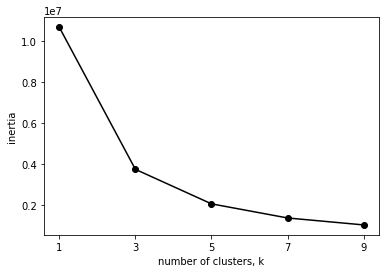

In [ ]:
ks = range(1, 10, 2)
inertias = []
for k in ks:
    
    model = KMeans(n_clusters=k)
    model.fit(machine_data_std)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()    

# K means Clustering

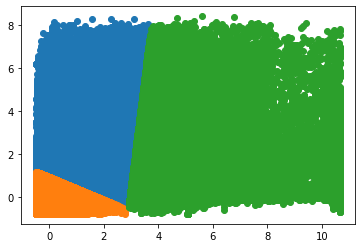

In [ ]:
model = KMeans(n_clusters=3)
model.fit(machine_data_std)
yhat = model.predict(machine_data_std)
clusters = unique(yhat)
for cluster in clusters:
	row_ix = where(yhat == cluster)
	plt.scatter(machine_data_std[row_ix, 0], machine_data_std[row_ix, 1])
plt.show()

# Some extra stuff

# PCA

([<matplotlib.axis.XTick at 0x7fa2cd86ff60>,
 <a list of 12 Text major ticklabel objects>)

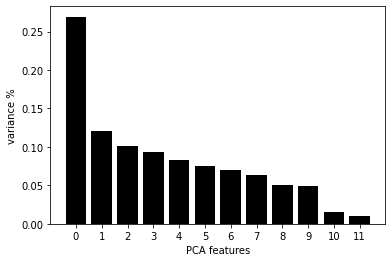

In [ ]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(data_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
pca = PCA(0.95)
pca_data = pca.fit_transform(data_std)

In [ ]:
pca_data

array([[ 3.72198968, -1.77262843, -0.35957449, ..., -1.0628235 ,
         0.92797404, -0.08796489],
       [ 3.86357081, -1.85471418, -0.3295523 , ..., -0.53692106,
         0.9811821 ,  0.08489453],
       [ 2.99066174, -1.82647442, -0.18903613, ..., -0.62644795,
         0.96311424, -0.09021957],
       ...,
       [-0.91362787,  0.44341127, -0.05189957, ...,  0.03456177,
         0.10593707,  0.0449662 ],
       [-0.91362787,  0.44341127, -0.05189957, ...,  0.03456177,
         0.10593707,  0.0449662 ],
       [-0.92316321,  0.44070268, -0.04820207, ...,  0.04587816,
         0.10615293,  0.0469951 ]])

In [ ]:
PCA_components = pd.DataFrame(pca_data)
PCA_components

,0,1,2,3,4,5,6,7,8,9
0,3.721990,-1.772628,-0.359574,0.235638,0.052377,-0.158633,-0.474475,-1.062823,0.927974,-0.087965
1,3.863571,-1.854714,-0.329552,0.643979,0.087048,-0.867406,-0.105470,-0.536921,0.981182,0.084895
2,2.990662,-1.826474,-0.189036,0.276328,0.069051,-0.395149,-0.237388,-0.626448,0.963114,-0.090220
3,5.367625,-1.834696,-0.914992,0.525878,0.038469,-0.269475,-0.815050,-1.327808,0.895525,-0.118161
4,5.448826,-1.596708,-0.621620,0.198791,0.021001,0.346382,-0.898397,-2.107935,0.855914,0.039719
...,...,...,...,...,...,...,...,...,...,...
5329725,-0.975364,0.428879,-0.029475,0.057844,-0.067010,-0.051135,0.242224,0.086720,0.108555,0.056727
5329726,-0.948454,0.435247,-0.039205,0.052477,-0.068368,-0.035135,0.226834,0.063687,0.107493,0.051516
5329727,-0.913628,0.443411,-0.051900,0.045930,-0.070104,-0.015112,0.207204,0.034562,0.105937,0.044966
5329728,-0.913628,0.443411,-0.051900,0.045930,-0.070104,-0.015112,0.207204,0.034562,0.105937,0.044966


Text(0, 0.5, 'PCA 2')

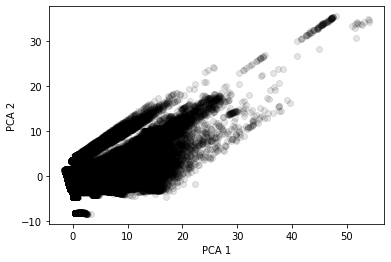

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
# kendall = PCA_components.corr(method = 'kendall')

# Correlation

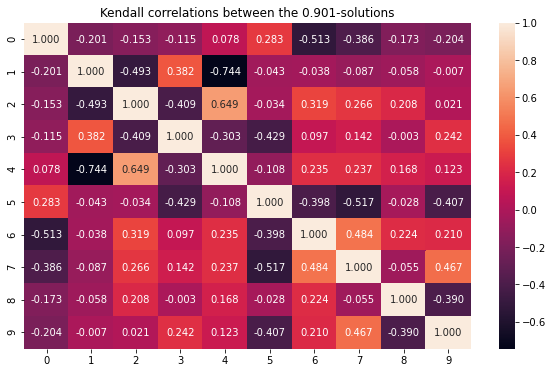

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Kendall correlations between the 0.901-solutions')
sns.heatmap(kendall, annot = True, fmt = ".3f")

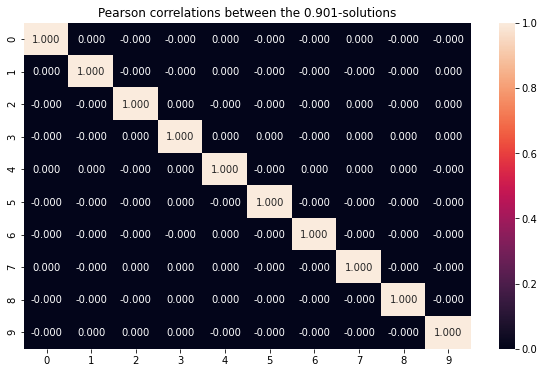

In [ ]:
pearson = PCA_components.corr(method = 'pearson')
plt.figure(figsize=(10, 6))
plt.title('Pearson correlations between the 0.901-solutions')
sns.heatmap(pearson, annot=True, fmt=".3f")

# Hierarchical clustering

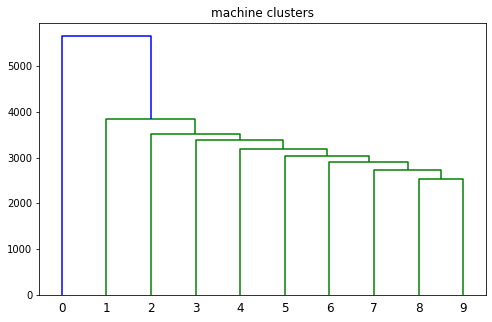

In [ ]:
np_solutions_set = PCA_components.T.values
solutions_set_dist = pdist(np_solutions_set)
linked = linkage(solutions_set_dist, 'ward')

fig = plt.figure(figsize=(8, 5))
dendrogram(linked, labels = PCA_components.columns)
plt.title('machine clusters')
plt.show()